# Real Estate Price Predictions

Notebook com predição do preço por unidade de área de casas.  
Dataset extraído do kaggle (https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction)

In [1]:
# Importando pacotes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sqlalchemy
from pandasql import sqldf
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Visualizando os dados
df = pd.read_csv('Real estate.csv')

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


#

## Data Cleaning

In [4]:
# Drop da primeira coluna
df.drop('No', axis=1, inplace = True)

In [5]:
# Renomeando as colunas
df.rename(columns= {'X1 transaction date': 'Data Transacao',
                    'X2 house age': 'Idade casa',
                    'X3 distance to the nearest MRT station': 'Distancia da estacao metro',
                    'X4 number of convenience stores': 'Numero lojas conveniencia',
                    'X5 latitude': 'Latitude',
                    'X6 longitude': 'Longitude',
                    'Y house price of unit area': 'Preco por unidade de area'}, inplace=True)

In [6]:
df.head()

,Data Transacao,Idade casa,Distancia da estacao metro,Numero lojas conveniencia,Latitude,Longitude,Preco por unidade de area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
# Verificação de registros duplicados
df.duplicated().sum() # Não há

0

In [8]:
# Verificação de valores ausentes
df.isna().sum() # Não há

Data Transacao                0
Idade casa                    0
Distancia da estacao metro    0
Numero lojas conveniencia     0
Latitude                      0
Longitude                     0
Preco por unidade de area     0
dtype: int64

## Pré-Processamento de Dados

In [9]:
# Separando a coluna "Data Transacao" em ano e mês.
ano_mes = df['Data Transacao'].apply(lambda x: str(x).split('.'))

ano = [year[0] for year in ano_mes]
mes = [month[1] for month in ano_mes]

df['Ano Transacao'] = ano
df['Mes Transacao'] = mes


In [10]:
df.head()

,Data Transacao,Idade casa,Distancia da estacao metro,Numero lojas conveniencia,Latitude,Longitude,Preco por unidade de area,Ano Transacao,Mes Transacao
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012,917
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012,917
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013,583
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013,5
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012,833


In [11]:
# Mudar posiçao das colunas de data e remover a inicial
mudar_posicao1 = df.pop('Ano Transacao')
mudar_posicao2 = df.pop('Mes Transacao')
remove_coluna = df.pop('Data Transacao')

df.insert(0, 'Ano Transacao', mudar_posicao1)
df.insert(1, 'Mes Transacao', mudar_posicao2)

In [12]:
df.head()

,Ano Transacao,Mes Transacao,Idade casa,Distancia da estacao metro,Numero lojas conveniencia,Latitude,Longitude,Preco por unidade de area
0,2012,917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012,917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013,583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013,5,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012,833,5.0,390.56840,5,24.97937,121.54245,43.1


In [13]:
# Agora é preciso adequar a coluna 'Mes Transacao' para ficar de 0 a 12 (Jan-Dez)
df['Mes Transacao'] = [int(mes)/83.33 for mes in df['Mes Transacao']]
df.head()

,Ano Transacao,Mes Transacao,Idade casa,Distancia da estacao metro,Numero lojas conveniencia,Latitude,Longitude,Preco por unidade de area
0,2012,11.004440,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012,11.004440,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013,6.996280,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013,0.060002,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012,9.996400,5.0,390.56840,5,24.97937,121.54245,43.1


In [14]:
for i in range(0, len(df)):
    if df['Mes Transacao'][i] < 1:
         df['Mes Transacao'][i] = 1
    elif df['Mes Transacao'][i] < 2:
         df['Mes Transacao'][i] = 2
    elif df['Mes Transacao'][i] < 3:
         df['Mes Transacao'][i] = 3
    elif df['Mes Transacao'][i] < 4:
         df['Mes Transacao'][i] = 4
    elif df['Mes Transacao'][i] < 5:
         df['Mes Transacao'][i] = 5
    elif df['Mes Transacao'][i] < 6:
         df['Mes Transacao'][i] = 6
    elif df['Mes Transacao'][i] < 7:
         df['Mes Transacao'][i] = 7
    elif df['Mes Transacao'][i] < 8:
         df['Mes Transacao'][i] = 8
    elif df['Mes Transacao'][i] < 9:
         df['Mes Transacao'][i] = 9
    elif df['Mes Transacao'][i] < 10:
         df['Mes Transacao'][i] = 10
    elif df['Mes Transacao'][i] < 11:
         df['Mes Transacao'][i] = 11
    elif df['Mes Transacao'][i] < 12:
         df['Mes Transacao'][i] = 12

# Transformndo a coluna de mês em inteiro
df = df.astype({'Mes Transacao': 'int'})
df = df.astype({'Ano Transacao': 'int'})

In [15]:
df[(df['Mes Transacao']== '1')]

,Ano Transacao,Mes Transacao,Idade casa,Distancia da estacao metro,Numero lojas conveniencia,Latitude,Longitude,Preco por unidade de area


In [16]:
df.head()

,Ano Transacao,Mes Transacao,Idade casa,Distancia da estacao metro,Numero lojas conveniencia,Latitude,Longitude,Preco por unidade de area
0,2012,12,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012,12,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013,7,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013,1,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012,10,5.0,390.56840,5,24.97937,121.54245,43.1


In [17]:
# Removendo as colunas 'Latitude' e 'Longitude' pois não serão necessárias.
df.drop(['Latitude', 'Longitude'],axis =1 , inplace = True)
df.head()

,Ano Transacao,Mes Transacao,Idade casa,Distancia da estacao metro,Numero lojas conveniencia,Preco por unidade de area
0,2012,12,32.0,84.87882,10,37.9
1,2012,12,19.5,306.59470,9,42.2
2,2013,7,13.3,561.98450,5,47.3
3,2013,1,13.3,561.98450,5,54.8
4,2012,10,5.0,390.56840,5,43.1


## Análise Exploratória

In [18]:
df.describe()

,Ano Transacao,Mes Transacao,Idade casa,Distancia da estacao metro,Numero lojas conveniencia,Preco por unidade de area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2012.695652,4.628019,17.712560,1083.885689,4.094203,37.980193
std,0.460687,3.880389,11.392485,1262.109595,2.945562,13.606488
min,2012.000000,1.000000,0.000000,23.382840,0.000000,7.600000
25%,2012.000000,1.000000,9.025000,289.324800,1.000000,27.700000
50%,2013.000000,4.000000,16.100000,492.231300,4.000000,38.450000
75%,2013.000000,7.000000,28.150000,1454.279000,6.000000,46.600000
max,2013.000000,12.000000,43.800000,6488.021000,10.000000,117.500000


In [20]:
# Não temos todos os meses do ano. Ao inves de separar por ano, talvez seja ideal separar por quarter (trimestre).
df['Mes Transacao'].unique()

array([12,  7,  1, 10,  9,  6,  4,  3])

In [21]:
# Transformando a coluna mes em trimestre.
for i in range(0, len(df)):
    if df['Mes Transacao'][i] <= 3:
        df['Mes Transacao'][i] = 'Q1'
    elif df['Mes Transacao'][i] <= 6:
        df['Mes Transacao'][i] = 'Q2'
    elif df['Mes Transacao'][i] <= 9:
        df['Mes Transacao'][i] = 'Q3'    
    elif df['Mes Transacao'][i] <= 12:
        df['Mes Transacao'][i] = 'Q4'
        
df['Mes Transacao'].value_counts()

Q1    205
Q2     87
Q4     69
Q3     53
Name: Mes Transacao, dtype: int64

In [23]:
# Temos apenas dois anos diferentes
df['Ano Transacao'].value_counts()

2013    288
2012    126
Name: Ano Transacao, dtype: int64

<AxesSubplot:>

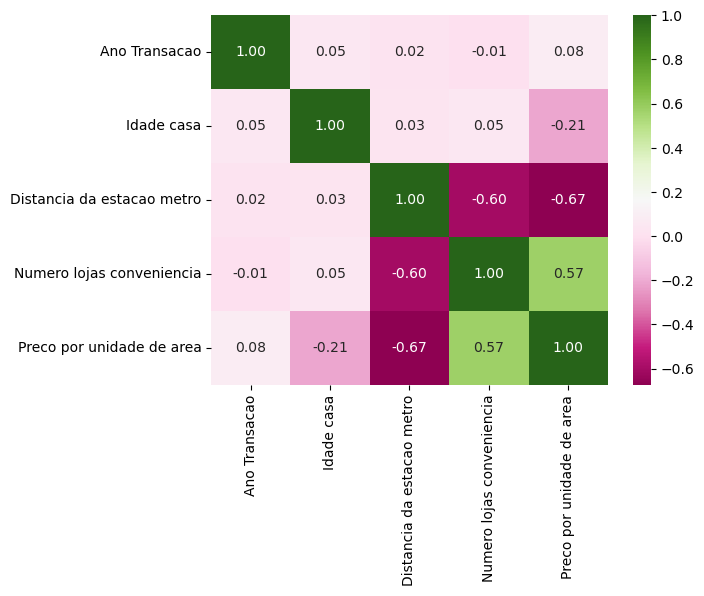

In [22]:
# Correlação
correlacao = df.corr()
sns.heatmap(correlacao, cmap = 'PiYG', annot = True, fmt = '.2f')